In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
info_data_path = "../data/model_training/raw_data/data.info"
with open(info_data_path, 'r') as f:
    info = f.read().splitlines()

info_list = [info[i].split(",") for i in range(len(info))]
info_df = pd.DataFrame(info_list[1:]) 
info_df.columns = info_list[0]

In [3]:
info_df["transcript_position"] = info_df["transcript_position"].astype(str).astype(int)
info_df["label"] = info_df["label"].astype(str).astype(int)
info_df.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


# A549

In [9]:
A549_rep5_run1 = pd.read_csv("../data/aws_predictions/A549_rep5_run1_prediction.csv")
A549_rep6_run1 = pd.read_csv("../data/aws_predictions/A549_rep6_run1_prediction.csv")

In [10]:
## merge the two replicates to compare similar transcript and position
A549_merge = A549_rep5_run1.merge(A549_rep6_run1, on = ['transcript','position'], how = 'inner')

## calculate mean predicted score 
A549_merge['scores_mean'] = A549_merge[['score_x', 'score_y']].mean(axis=1)
A549_merge["label_mean"] = A549_merge.scores_mean.map(lambda x:1 if x >= 0.35 else 0)

## merge with info_df to get the actual labels
A549_pred_actual = A549_merge.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
A549_pred_actual = A549_pred_actual.drop(["transcript_id", "transcript_position"], axis = 1)
A549_pred_actual.label= A549_pred_actual.label.astype(int)

## create a bool col to check if predicted label mean == actual
A549_pred_actual['mean_tp'] = np.where((A549_pred_actual['label_mean'] == A549_pred_actual['label']), True, False)
A549_pred_actual.head()

,transcript,position,score_x,score_y,scores_mean,label_mean,gene_id,label,mean_tp
0,ENST00000373020,1006,0.004545,0.031818,0.018182,0,ENSG00000000003,0,True
1,ENST00000373020,1013,0.009091,0.009091,0.009091,0,ENSG00000000003,0,True
2,ENST00000373020,1149,0.004545,0.000000,0.002273,0,ENSG00000000003,0,True
3,ENST00000373020,512,0.013636,0.036364,0.025000,0,ENSG00000000003,0,True
4,ENST00000373020,689,0.004545,0.027273,0.015909,0,ENSG00000000003,0,True


In [11]:
ind = ["True", "False"]
plot_df = pd.DataFrame(list(A549_pred_actual["mean_tp"].value_counts()), columns = ["A549"], index = ind)
plot_df

,A549
True,115016
False,4346


# HCT116

In [12]:
Hct116_rep3_run1 = pd.read_csv("../data/aws_predictions/Hct116_rep3_run1_prediction.csv")
Hct116_rep3_run4 = pd.read_csv("../data/aws_predictions/Hct116_rep3_run4_prediction.csv")
Hct116_rep4_run3 = pd.read_csv("../data/aws_predictions/hct116_rep4_run3_prediction.csv")

In [13]:
## merge the two replicates to compare similar transcript and position
HCT116_merge = Hct116_rep3_run1.merge(Hct116_rep3_run4, on = ['transcript','position'], how = 'inner')
HCT116_merge = HCT116_merge.merge(Hct116_rep4_run3, on = ['transcript','position'], how = 'inner')

## calculate mean predicted score 
HCT116_merge['scores_mean'] = HCT116_merge[['score_x', 'score_y', 'score']].mean(axis=1)
HCT116_merge["label_mean"] = HCT116_merge.scores_mean.map(lambda x:1 if x >= 0.35 else 0)

## merge with info_df to get the actual labels
HCT116_pred_actual = HCT116_merge.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
HCT116_pred_actual = HCT116_pred_actual.drop(["transcript_id", "transcript_position"], axis = 1)
HCT116_pred_actual.label= HCT116_pred_actual.label.astype(int)

## create a bool col to check if predicted label mean == actual
HCT116_pred_actual['mean_tp'] = np.where((HCT116_pred_actual['label_mean'] == HCT116_pred_actual['label']), True, False)

In [14]:
plot_df["HCT116"] = list(HCT116_pred_actual["mean_tp"].value_counts())
plot_df

,A549,HCT116
True,115016,118909
False,4346,2929


# HEPG2

In [15]:
hepG2_rep5_run2 = pd.read_csv("../data/aws_predictions/hepG2_rep5_run2_prediction.csv")
hepG2_rep6_run1 = pd.read_csv("../data/aws_predictions/hepG2_rep6_run1_prediction.csv")

In [16]:
## merge the two replicates to compare similar transcript and position
HEPG2_merge = hepG2_rep5_run2.merge(hepG2_rep6_run1, on = ['transcript','position'], how = 'inner')

## calculate mean predicted score 
HEPG2_merge['scores_mean'] = HEPG2_merge[['score_x', 'score_y']].mean(axis=1)
HEPG2_merge["label_mean"] = HEPG2_merge.scores_mean.map(lambda x:1 if x >= 0.35 else 0)

## merge with info_df to get the actual labels
HEPG2_pred_actual = HEPG2_merge.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
HEPG2_pred_actual = HEPG2_pred_actual.drop(["transcript_id", "transcript_position"], axis = 1)
HEPG2_pred_actual.label= HEPG2_pred_actual.label.astype(int)

## create a bool col to check if predicted label mean == actual
HEPG2_pred_actual['mean_tp'] = np.where((HEPG2_pred_actual['label_mean'] == HEPG2_pred_actual['label']), True, False)
HEPG2_pred_actual.head()

,transcript,position,score_x,score_y,scores_mean,label_mean,gene_id,label,mean_tp
0,ENST00000373020,1006,0.009280,0.040909,0.025095,0,ENSG00000000003,0,True
1,ENST00000373020,1013,0.009091,0.009091,0.009091,0,ENSG00000000003,0,True
2,ENST00000373020,1149,0.000000,0.000000,0.000000,0,ENSG00000000003,0,True
3,ENST00000373020,512,0.045455,0.040909,0.043182,0,ENSG00000000003,0,True
4,ENST00000373020,689,0.022727,0.045455,0.034091,0,ENSG00000000003,0,True


In [17]:
plot_df["HEPG2"] = list(HEPG2_pred_actual["mean_tp"].value_counts())
plot_df

,A549,HCT116,HEPG2
True,115016,118909,114554
False,4346,2929,4347


# K562

In [18]:
k562_rep4_run1 = pd.read_csv("../data/aws_predictions/k562_rep4_run1_prediction.csv")
k562_rep5_run1 = pd.read_csv("../data/aws_predictions/k562_rep5_run1_prediction.csv")
k562_rep6_run1 = pd.read_csv("../data/aws_predictions/k562_rep6_run1_prediction.csv")

In [19]:
## merge the two replicates to compare similar transcript and position
K562_merge = k562_rep4_run1.merge(k562_rep5_run1, on = ['transcript','position'], how = 'inner')
K562_merge = K562_merge.merge(k562_rep6_run1, on = ['transcript','position'], how = 'inner')

## calculate mean predicted score 
K562_merge['scores_mean'] = K562_merge[['score_x', 'score_y', 'score']].mean(axis=1)
K562_merge["label_mean"] = K562_merge.scores_mean.map(lambda x:1 if x >= 0.35 else 0)

## merge with info_df to get the actual labels
K562_pred_actual = K562_merge.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
K562_pred_actual = K562_pred_actual.drop(["transcript_id", "transcript_position"], axis = 1)
K562_pred_actual.label= K562_pred_actual.label.astype(int)

## create a bool col to check if predicted label mean == actual
K562_pred_actual['mean_tp'] = np.where((K562_pred_actual['label_mean'] == K562_pred_actual['label']), True, False)
K562_pred_actual.head()

,transcript,position,score_x,score_y,score,scores_mean,label_mean,gene_id,label,mean_tp
0,ENST00000371582,1030,0.000000,0.004545,0.027273,0.010606,0,ENSG00000000419,0,True
1,ENST00000371582,105,0.045739,0.013636,0.009110,0.022829,0,ENSG00000000419,0,True
2,ENST00000371582,1123,0.045455,0.018182,0.004545,0.022727,0,ENSG00000000419,0,True
3,ENST00000371582,147,0.027729,0.072751,0.086364,0.062281,0,ENSG00000000419,0,True
4,ENST00000371582,242,0.054545,0.045583,0.013636,0.037922,0,ENSG00000000419,0,True


In [20]:
plot_df["K562"] = list(K562_pred_actual["mean_tp"].value_counts())
plot_df

,A549,HCT116,HEPG2,K562
True,115016,118909,114554,94450
False,4346,2929,4347,3493


# MCF7

In [21]:
mcf7_rep3_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep3_run1_prediction.csv")
mcf7_rep4_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep4_run1_prediction.csv")

In [22]:
## merge the two replicates to compare similar transcript and position
MCF7_merge = mcf7_rep3_run1.merge(mcf7_rep4_run1, on = ['transcript','position'], how = 'inner')

## calculate mean predicted score 
MCF7_merge['scores_mean'] = MCF7_merge[['score_x', 'score_y']].mean(axis=1)
MCF7_merge["label_mean"] = MCF7_merge.scores_mean.map(lambda x:1 if x >= 0.35 else 0)

## merge with info_df to get the actual labels
MCF7_pred_actual = MCF7_merge.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
MCF7_pred_actual = MCF7_pred_actual.drop(["transcript_id", "transcript_position"], axis = 1)
MCF7_pred_actual.label= MCF7_pred_actual.label.astype(int)

## create a bool col to check if predicted label mean == actual
MCF7_pred_actual['mean_tp'] = np.where((MCF7_pred_actual['label_mean'] == MCF7_pred_actual['label']), True, False)
MCF7_pred_actual.head()

,transcript,position,score_x,score_y,scores_mean,label_mean,gene_id,label,mean_tp
0,ENST00000373020,1006,0.009091,0.009091,0.009091,0,ENSG00000000003,0,True
1,ENST00000373020,1013,0.009091,0.009091,0.009091,0,ENSG00000000003,0,True
2,ENST00000373020,1149,0.000000,0.000000,0.000000,0,ENSG00000000003,0,True
3,ENST00000373020,512,0.018182,0.018182,0.018182,0,ENSG00000000003,0,True
4,ENST00000373020,689,0.009091,0.009091,0.009091,0,ENSG00000000003,0,True


In [23]:
plot_df["MCF7"] = list(MCF7_pred_actual["mean_tp"].value_counts())
plot_df

,A549,HCT116,HEPG2,K562,MCF7
True,115016,118909,114554,94450,114861
False,4346,2929,4347,3493,4620


# Plot Bar

Text(0.5, 1.0, 'True Positives According to Threshold')

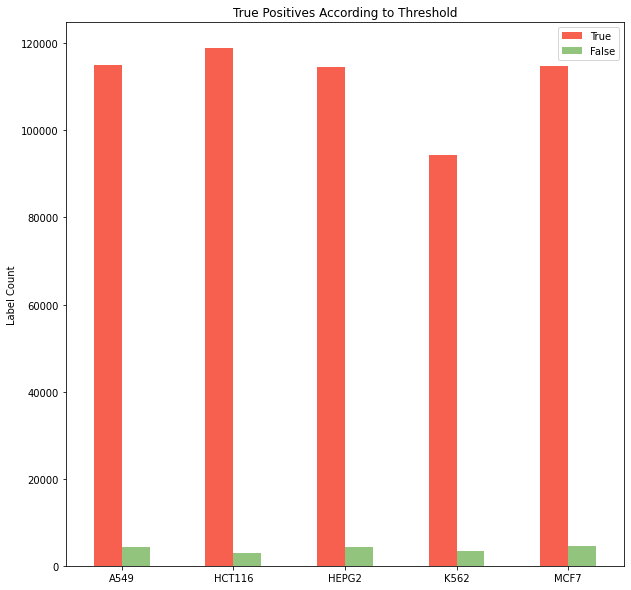

In [24]:
from turtle import width

colour_scheme = {"True": "#f75f4f", "False": "#93c47d"}
plot_df_transpose = plot_df.transpose()
plot_df_transpose.plot(kind = "bar", figsize = (10, 10), color = colour_scheme)

plt.ylabel("Label Count")
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("True Positives According to Threshold")

# Plot ROC Curve

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score, plot_confusion_matrix

In [28]:
cell_lines_df = [A549_pred_actual, HCT116_pred_actual, HEPG2_pred_actual, K562_pred_actual, MCF7_pred_actual]
fpr_ls, tpr_ls, roc_auc_ls = [], [], []

for cell_line in cell_lines_df:
    pred = cell_line["scores_mean"]
    test = cell_line["label"]
    fpr, tpr, thresholds = roc_curve(test, pred)
    roc_auc = roc_auc_score(test, pred)
    fpr_ls.append(fpr)
    tpr_ls.append(tpr)
    roc_auc_ls.append(roc_auc)

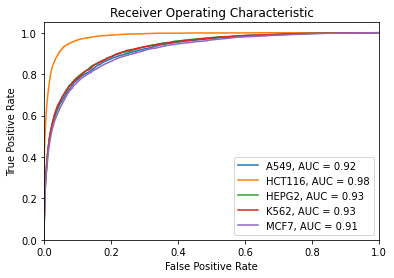

In [30]:
# ROC Curve
cell_lines = ["A549", "HCT116", "HEPG2", "K562", "MCF7"]

for i in range(len(cell_lines_df)):
    plt.plot(fpr_ls[i], tpr_ls[i], label = f"{cell_lines[i]}, AUC = %0.2f" % roc_auc_ls[i])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")